In [1]:
import sys
print(sys.executable)

import os
print(os.environ["PATH"],'\n\n')
print(os.environ.get("CUDA_PATH"),'\n\n')
print(os.environ.get("CUDA_HOME"),'\n\n\n--------------------------')
os.environ["PATH"] += ";C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\11.8\\bin"
os.environ["CUDA_HOME"] = "C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\11.8"
print(os.environ["PATH"],'\n\n')
print(os.environ.get("CUDA_PATH"),'\n\n')
print(os.environ.get("CUDA_HOME"))


C:\Users\itsallinthegamE\anaconda3\python.exe
C:\Users\itsallinthegamE\anaconda3;C:\Users\itsallinthegamE\anaconda3\Library\mingw-w64\bin;C:\Users\itsallinthegamE\anaconda3\Library\usr\bin;C:\Users\itsallinthegamE\anaconda3\Library\bin;C:\Users\itsallinthegamE\anaconda3\Scripts;C:\Program Files (x86)\VMware\VMware Workstation\bin\;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8\bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8\libnvvp;C:\Users\itsallinthegamE\AppData\Local\Programs\Python\Python313\Scripts;C:\Users\itsallinthegamE\AppData\Local\Programs\Python\Python313;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\dotnet\;C:\Users\itsallinthegamE\AppData\Local\Programs\Python\Python313\Scripts\pip.exe;C:\Program Files\NVIDIA Corporation\NVIDIA app\NvDLISR;C:\Users\itsallinthegamE\anaconda3;C:\Program Files\MATLAB

In [2]:
#import os
#os.environ['PATH']

In [3]:
import tensorflow
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))
print(tensorflow.config.list_physical_devices('GPU')) # Detailed info

Num GPUs Available:  0
[]


In [4]:
#pip install tensorflow-gpu

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler  
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import regularizers

In [6]:
import os
import pandas as pd
import cv2  # If you're working with images

In [7]:
dataset_path = "C:/Users/itsallinthegamE/Downloads/this is where my dataset will reside/Driver Drowsiness Dataset (DDD)"

# 2. Create an empty list to store your data
data = []

# 3. Loop through the subfolders (classes)
classes = ["Alert", "Drowsy"]  # Assuming these are the exact folder names
for class_name in classes:
    print(class_name)
    class_path = os.path.join(dataset_path, class_name)
    for image_file in os.listdir(class_path):
        if image_file.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Check for common image formats
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
            data.append([img, class_name])

Alert
Drowsy


In [8]:
df = pd.DataFrame(data, columns=["image", "label"])
df = df.sample(frac=1, random_state=42)
df

,image,label
29183,"[[179, 179, 179, 178, 178, 178, 178, 178, 179,...",Drowsy
11257,"[[39, 35, 34, 34, 34, 36, 36, 36, 37, 37, 38, ...",Alert
7090,"[[128, 127, 127, 127, 126, 127, 129, 131, 126,...",Alert
5987,"[[254, 254, 254, 254, 254, 253, 254, 254, 253,...",Alert
2111,"[[135, 137, 136, 130, 127, 128, 130, 129, 130,...",Alert
...,...,...
6265,"[[253, 253, 253, 253, 253, 253, 253, 253, 253,...",Alert
11284,"[[91, 99, 107, 113, 114, 117, 121, 123, 127, 1...",Alert
38158,"[[41, 34, 31, 31, 28, 26, 22, 17, 20, 30, 27, ...",Drowsy
860,"[[202, 203, 203, 203, 203, 203, 203, 203, 203,...",Alert


In [9]:
df['image'][1]

array([[210, 211, 210, ..., 242, 242, 242],
       [211, 211, 210, ..., 243, 242, 242],
       [211, 211, 210, ..., 244, 244, 244],
       ...,
       [105, 105, 105, ..., 124, 124, 124],
       [105, 104, 104, ..., 126, 126, 126],
       [104, 104, 104, ..., 129, 122, 122]], dtype=uint8)

Text(0.5, 0, 'Alert')

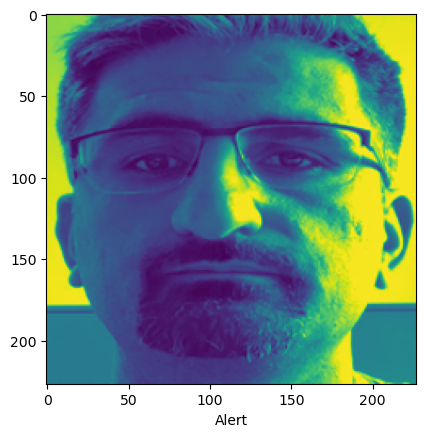

In [10]:
plt.imshow(df['image'][1])
plt.xlabel(df['label'][1])

In [11]:
images = df.drop('label', axis=1)
labels =df['label']

In [12]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 
#df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
'''X_train = df_train.drop('label', axis=1)
X_train = X_train.astype('float32') / 255.0
Y_train =df_train['label']
X_test = df_test.drop('label', axis=1)
X_test = X_test.astype('float32') / 255.0
Y_test =df_test['label']

label_encoder = LabelEncoder()'''
#images = images.reshape(-1, 227, 227, 1)  # Add channel dimension for grayscale
#images = images.astype('float32') / 255.0  # Normalize pixel values


"X_train = df_train.drop('label', axis=1)\nX_train = X_train.astype('float32') / 255.0\nY_train =df_train['label']\nX_test = df_test.drop('label', axis=1)\nX_test = X_test.astype('float32') / 255.0\nY_test =df_test['label']\n\nlabel_encoder = LabelEncoder()"

In [14]:
#print(X_train.shape)
#print(X_test.shape)

In [15]:
#print(Y_train.shape)
#print(Y_test.shape)

In [16]:
img_height=img_width=227

In [17]:
#X_train_reshaped = np.array([k.reshape( img_height, img_width,1) for k in X_train['image']] ) 
#X_test_reshaped = np.array([k.reshape( img_height, img_width,1) for k in X_test['image']] )

In [18]:
#df['image'][1].reshape(227,227,1)

In [19]:
#X_test_reshaped.shape

In [20]:
#Y_train = Y_train.reset_index(drop=True)
#Y_train

In [21]:
import random
'''idx = random.randint(0, len(Y_train))
plt.imshow(X_train_reshaped[idx],cmap='gray')
plt.xlabel(Y_train[idx])
plt.show()'''

"idx = random.randint(0, len(Y_train))\nplt.imshow(X_train_reshaped[idx],cmap='gray')\nplt.xlabel(Y_train[idx])\nplt.show()"

In [22]:
#Y_test = Y_test.reset_index(drop=True)
#Y_test

In [23]:
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

In [24]:
X_train.shape
X_train = np.array([k.reshape( img_height, img_width,1) for k in X_train['image']] ) 
X_test = np.array([k.reshape( img_height, img_width,1) for k in X_test['image']] )
X_train.shape


(33434, 227, 227, 1)

In [25]:
Y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen =ImageDataGenerator(rotation_range=20, zoom_range=0.2, horizontal_flip=True)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [27]:
#datagen

In [28]:
#from tensorflow.keras.applications import MobileNet
#base_model= MobileNet(weights='imagenet', include_top=False, input_shape=(227, 227,1))
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(227, 227, 1), 
           kernel_regularizer=regularizers.l2(0.0005)), 
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu',
           kernel_regularizer=regularizers.l2(0.0005)), 
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu',
           kernel_regularizer=regularizers.l2(0.0005)), 
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu',
          kernel_regularizer=regularizers.l2(0.0005)), 
    Dropout(0.6),
    Dense(2, activation='sigmoid') #binary classification
])

C:\Users\itsallinthegamE\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0007), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [30]:
model.fit(datagen.flow(X_train, Y_train, batch_size=30), epochs=20, validation_data=(X_test, Y_test),callbacks=[early_stopping])

C:\Users\itsallinthegamE\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 874s 780ms/step - accuracy: 0.5689 - loss: 3.4810 - val_accuracy: 0.7493 - val_loss: 0.6562
Epoch 2/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 867s 778ms/step - accuracy: 0.7363 - loss: 0.7250 - val_accuracy: 0.8072 - val_loss: 0.5879
Epoch 3/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 868s 779ms/step - accuracy: 0.8060 - loss: 0.6499 - val_accuracy: 0.9269 - val_loss: 0.4580
Epoch 4/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 870s 780ms/step - accuracy: 0.8621 - loss: 0.5801 - val_accuracy: 0.9415 - val_loss: 0.4466
Epoch 5/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 867s 778ms/step - accuracy: 0.8822 - loss: 0.5534 - val_accuracy: 0.9592 - val_loss: 0.3825
Epoch 6/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 868s 779ms/step - accuracy: 0.9057 - loss: 0.5000 - val_accuracy: 0.9718 - val_loss: 0.3500
Epoch 7/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 869s 779ms/step - accuracy: 0.9202 - loss: 0.4598 - val_accuracy: 0.9766 - val_loss: 0.3236
Epoch 8/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 870s 780ms/step - ac

In [31]:
model.save("C:/Users/itsallinthegamE/Downloads/sleep_detection_l2_00_reg.keras")

In [32]:
loss, accuracy = model.evaluate(X_test, Y_test)


262/262 ━━━━━━━━━━━━━━━━━━━━ 54s 205ms/step - accuracy: 0.9952 - loss: 0.2099


In [33]:
accuracy*100

99.50951337814331

In [34]:
#saved_path="C:/Users/itsallinthegamE/Downloads/sleep_detection_l2_1_reg.keras"
saved_path="C:/Users/itsallinthegamE/Downloads/sleep_detection_l2_00_reg.keras"

In [35]:
from tensorflow.keras.models import load_model
loaded_model = load_model(saved_path)

In [36]:
loss2, accuracy2 = loaded_model.evaluate(X_test, Y_test)
print(f"Loaded Model Test Loss: {loss2:.4f}")
print(f"Loaded Model Test Accuracy: {100*accuracy2:.4f}%")

262/262 ━━━━━━━━━━━━━━━━━━━━ 55s 205ms/step - accuracy: 0.9952 - loss: 0.2099
Loaded Model Test Loss: 0.2110
Loaded Model Test Accuracy: 99.5095%


In [37]:
labels_encoded


array([1, 0, 0, ..., 1, 0, 0])

In [38]:
labels_categorical


array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])